
# Práctica 1: Robot móvil (Parte 3) — Modelo cinemático unicycle

**Enunciado general (caso: aspiradora autónoma doméstica).**  
En esta práctica modelaremos un **robot móvil** tipo *unicycle* (como una **aspiradora autónoma**) en el plano. El estado del robot es $(x, y, \theta)$, donde $(x,y)$ es su **posición** y $\theta$ su **orientación**. Las entradas de control son $u=(v,\omega)$, con $v$ la **velocidad lineal** y $\omega$ la **velocidad angular**. Trabajaremos con **soluciones numéricas** y, más adelante, añadiremos **incertidumbre** para representar efectos como **deslizamiento**, **ruido del actuador** o **errores de odometría**. En cada ejercicio encontrarás:
- Un **enunciado** con lo que se pide.
- Bloques de **preguntas y reflexión**.
- Debes generar un nuevo bloque con el código que se pide en cada ejercicio.

## Ejemplo de funciones para gráficas

A continuación se muestra código de ejemplo, organizado en funciones, para poder mostrar el estado del robot en cada iteración de la integración numérica:


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

try:
    import ipywidgets as widgets
    from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
except Exception as e:
    print("Si ipywidgets no está disponible, instala con: pip install ipywidgets y reinicia el entorno.")

plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams["axes.grid"] = True

def unicycle_rhs(state, u):
    x, y, th = state
    v, om = u
    return np.array([v*np.cos(th), v*np.sin(th), om])

def plot_robot_state(path_xy, state, title="Robot móvil (unicycle)"):
    x, y, th = state
    xs = [p[0] for p in path_xy]
    ys = [p[1] for p in path_xy]

    plt.figure()
    plt.plot(xs, ys, lw=2, label="Trayectoria")
    plt.scatter([x], [y], s=60, label="Posición")
    L = 0.5
    dx = L*np.cos(th)
    dy = L*np.sin(th)
    plt.arrow(x, y, dx, dy, head_width=0.2, head_length=0.2, length_includes_head=True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.title(title)
    plt.legend()
    plt.show()

def simulate_and_plot_stepwise(state0, u, dt, steps, pause=0.01, title_prefix="", update_every=20):
    state = np.array(state0, dtype=float)
    path_xy = [state[:2].copy()]

    for k in range(steps):
        deriv = unicycle_rhs(state, u)
        state = state + dt*deriv
        path_xy.append(state[:2].copy())

        if (k+1) % update_every == 0 or (k+1) == steps:
            clear_output(wait=True)
            plot_robot_state(path_xy, state, title=f"{title_prefix} Paso {k+1}/{steps}  |  u=(v={u[0]:.2f}, ω={u[1]:.2f})")
            display(plt.gcf())
            time.sleep(pause)
    return np.array(path_xy), state



## Ejercicio 1. Modelo cinemático $(x,y,\theta)$ con solución numérica paso a paso

**Contexto (aspiradora autónoma).**  
Una aspiradora **autónoma** se desplaza en el suelo con cinemática tipo *unicycle*. Sus ecuaciones de movimiento (en un plano) son:
$$
\dot{x} = v\cos\theta,\qquad
\dot{y} = v\sin\theta,\qquad
\dot{\theta} = \omega,
$$
donde $v$ es la velocidad lineal y $\omega$ la velocidad angular.

**Tareas.**
1. Integra **numéricamente** el sistema y **muestra los resultados en cada 20 iteraciones** para $u=(v,\omega)$ constante.  
2. La figura debe mostrar:
   - Ejes **X–Y**.
   - La **trayectoria** (línea azul).
   - La **posición** actual del robot (punto **rojo**).
   - La **orientación** del robot (flecha **roja**).
3. **Inicializa** con condiciones para describir un **círculo** y **ejecuta dos vueltas completas**.

> *Pista:* para una trayectoria circular, si $u=(v,\omega)$ es constante y $\omega\neq 0$, el radio es $R=\frac{v}{\omega}$. Para dar dos vueltas, integra durante un tiempo $T=\frac{4\pi}{\omega}$.

**A continuación se proporciona la solución:**


<Figure size 600x600 with 0 Axes>

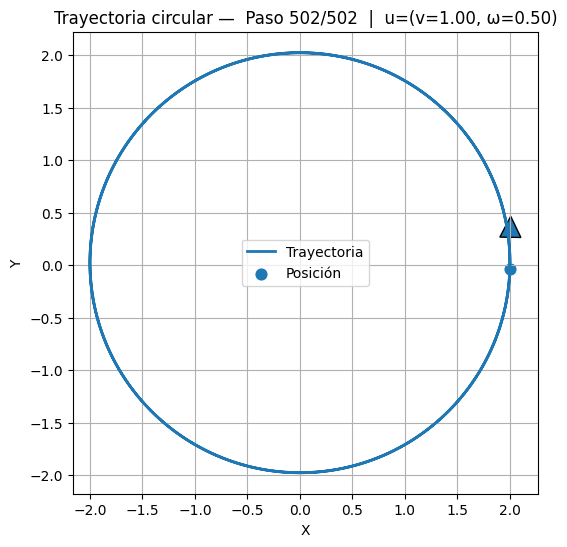

<Figure size 600x600 with 0 Axes>

Estado final: [ 1.99932278 -0.03273471 14.12079633]


<Figure size 600x600 with 0 Axes>

In [3]:

# Parámetros para dos vueltas en círculo
v = 1.0
omega = 0.5
T = 4*np.pi/omega
dt = 0.05
steps = int(T/dt)

x0, y0, th0 = 2.0, 0.0, np.pi/2

path, final_state = simulate_and_plot_stepwise(
    state0=(x0, y0, th0),
    u=(v, omega),
    dt=dt,
    steps=steps,
    pause=0.5,
    title_prefix="Trayectoria circular — ",
    update_every=20
)

print("Estado final:", final_state)



> **Preguntas (responder en texto):**
> 1. ¿Qué **representación matemática** se está utilizando (p.ej., espacio de estados, ecuaciones diferenciales, etc.)?
> 2. Clasifica el sistema según:
>    - Relación entrada–salida  
>    - Tipo de incertidumbre  
>    - Naturaleza de tiempo  
>    - Dependencia temporal
>
> 3. **Explica y razona** qué está ocurriendo en el movimiento. ¿Es repetitivo el proceso? ¿Qué pasaría si se dan más vueltas?



## Ejercicio 2. Incertidumbre aleatoria e interactividad

**Enunciado.**  
Una aspiradora real sufre **ruidos** y **deslizamientos**: la odometría y los actuadores no son perfectos. Añade una **variable aleatoria** como incertidumbre sobre cada variable de control $u=(v,\omega)$, y define la varianza de cada variable aleatoria como $\sigma = (\sigma_v,\sigma_\omega)$, no es necesario incluir interactividad. Observa cómo cambia la trayectoria para distintos valores de $σ$.

> **Preguntas (responder en texto):**
> 1. Clasifica el sistema según:
>    - Relación entrada–salida  
>    - Tipo de incertidumbre  
>    - Naturaleza de tiempo  
>    - Dependencia temporal
>
> 2. ¿Qué ocurre si ejecutas con **incertidumbre** $\sigma = (0, 0)$? ¿Y si ejecutas varias veces con distintas incertidumbres? Prueba también con incertidumbres altas.
>
> 3. ¿Por qué se comporta así el sistema con alta incertidumbre? ¿Es repetitivo el proceso? ¿Qué pasaría si se dan más vueltas?


In [6]:
# Función para simular con incertidumbre (ruido)
def simulate_and_plot_stochastic(state0, u, dt, steps, sigmas, pause=0.01, title_prefix="", update_every=20):
    '''
    Esta función es como la del ejercicio 1, pero añade ruido a los controles.
    'sigmas' es una tupla (sigma_v, sigma_omega) que controla cuánta aleatoriedad metemos.
    '''
    state = np.array(state0, dtype=float)
    path_xy = [state[:2].copy()]
    v_base, omega_base = u
    sigma_v, sigma_omega = sigmas

    for k in range(steps):
        # Añadimos ruido gaussiano a los controles en cada paso
        v_noisy = v_base + np.random.normal(0, sigma_v)
        omega_noisy = omega_base + np.random.normal(0, sigma_omega)
        u_noisy = (v_noisy, omega_noisy)
        
        # Calculamos la derivada y actualizamos el estado
        deriv = unicycle_rhs(state, u_noisy)
        state = state + dt*deriv
        path_xy.append(state[:2].copy())

        # Actualizamos la gráfica cada cierto número de pasos
        if (k+1) % update_every == 0 or (k+1) == steps:
            clear_output(wait=True)
            plot_robot_state(path_xy, state, title=f"{title_prefix} Paso {k+1}/{steps} | σ=({sigma_v:.2f}, {sigma_omega:.2f})")
            display(plt.gcf())
            time.sleep(pause)
            
    return np.array(path_xy), state

# --- Envoltura interactiva para la simulación ---

@interact(
    sigma_v=FloatSlider(min=0.0, max=0.5, step=0.01, value=0.1, description='Ruido v (σ_v)'),
    sigma_omega=FloatSlider(min=0.0, max=0.3, step=0.01, value=0.05, description='Ruido ω (σ_ω)')
)
def interactive_stochastic_simulation(sigma_v, sigma_omega):
    '''
    Esta función envuelve la simulación con ruido para hacerla interactiva.
    Usa los sliders para cambiar el nivel de incertidumbre y observa cómo cambia la trayectoria.
    '''
    # Parámetros base (fijos para esta simulación)
    v = 1.0
    omega = 0.5
    T = 4*np.pi/omega
    dt = 0.05
    steps = int(T/dt)
    x0, y0, th0 = 2.0, 0.0, np.pi/2

    # Ejecutamos la simulación con los sigmas de los sliders
    path, final_state = simulate_and_plot_stochastic(
        state0=(x0, y0, th0),
        u=(v, omega),
        dt=dt,
        steps=steps,
        sigmas=(sigma_v, sigma_omega),
        pause=0.5,
        title_prefix="Trayectoria con ruido — ",
        update_every=20
    )
    print("Estado final con incertidumbre:", final_state)


interactive(children=(FloatSlider(value=0.1, description='Ruido v (σ_v)', max=0.5, step=0.01), FloatSlider(val…